## 08-2 정규 표현식 시작하기

### 1. 정규 표현식의 기초, 메타 문자

정규 표현식에서 사용하는 메타 문자(meta characters)에는 다음과 같은 것이 있다.  

> 메타 문자란 원래 그 문자가 가진 뜻이 아닌 특별한 용도로 사용하는 문자를 말한다.



. ^ $ * + ? { } [ ] \ | ( )
정규 표현식에 위 메타 문자를 사용하면 특별한 의미를 갖게 된다.  

자, 그러면 가장 간단한 정규 표현식부터 시작해 각 메타 문자의 의미와 사용법을 알아보자.

#### 문자 클래스 [ ]
우리가 가장 먼저 살펴볼 메타 문자는 바로 문자 클래스(character class)인 [ ]이다. 문자 클래스로 만들어진 정규식은 "[ ] 사이의 문자들과 매치"라는 의미를 갖는다.

>문자 클래스를 만드는 메타 문자인 [ ] 사이에는 어떤 문자도 들어갈 수 있다.

즉 정규 표현식이 [abc]라면 이 표현식의 의미는 "a, b, c 중 한 개의 문자와 매치"를 뜻한다. 이해를 돕기 위해 문자열 "a", "before", "dude"가 정규식 [abc]와 어떻게 매치되는지 살펴보자.



- "a"는 정규식과 일치하는 문자인 "a"가 있으므로 매치
- "before"는 정규식과 일치하는 문자인 "b"가 있으므로 매치
- "dude"는 정규식과 일치하는 문자인 a, b, c 중 어느 하나도 포함하고 있지 않으므로 매치되지 않음

[ ] 안의 두 문자 사이에 하이픈(-)을 사용하면 두 문자 사이의 범위(From - To)를 의미한다. 예를 들어 [a-c]라는 정규 표현식은 [abc]와 동일하고 [0-5]는 [012345]와 동일하다.


다음은 하이픈(-)을 사용한 문자 클래스의 사용 예이다.

- [a-zA-Z] : 알파벳 모두
- [0-9] : 숫자

문자 클래스([ ]) 안에는 어떤 문자나 메타 문자도 사용할수 있지만 주의해야 할 메타 문자가 1가지 있다. 그것은 바로 ^인데, 문자 클래스 안에 ^ 메타 문자를 사용할 경우에는 반대(not)라는 의미를 갖는다. 예를 들어 [^0-9]라는 정규 표현식은 숫자가 아닌 문자만 매치된다.

----------------

#### 점프 투 파이썬

자주 사용하는 문자 클래스
[0-9] 또는 [a-zA-Z] 등은 무척 자주 사용하는 정규 표현식이다. 이렇게 자주 사용하는 정규식은 별도의 표기법으로 표현할 수 있다. 다음을 기억해 두자.

- \d - 숫자와 매치, [0-9]와 동일한 표현식이다.
- \D - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식이다.
- \s - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식이다. 맨 앞의 빈 칸은 공백문자(space)를 의미한다.
- \S - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.
- \w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
- \W - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식이다.

대문자로 사용된 것은 소문자의 반대임을 추측할 수 있다.

------------------

### Dot(.)
정규 표현식의 Dot(.) 메타 문자는 줄바꿈 문자인 \n을 제외한 모든 문자와 매치됨을 의미한다.

>나중에 배우겠지만 정규식을 작성할 때 re.DOTALL 옵션을 주면 \n 문자와도 매치된다.

다음 정규식을 보자.

a.b
위 정규식의 의미는 다음과 같다.

>"a + 모든문자 + b"

즉 a와 b라는 문자 사이에 어떤 문자가 들어가도 모두 매치된다는 의미이다.

이해를 돕기 위해 문자열 "aab", "a0b", "abc"가 정규식 a.b와 어떻게 매치되는지 살펴보자.

- "aab"는 가운데 문자 "a"가 모든 문자를 의미하는 .과 일치하므로 정규식과 매치된다.
- "a0b"는 가운데 문자 "0"가 모든 문자를 의미하는 .과 일치하므로 정규식과 매치된다.
- "abc"는 "a"문자와 "b"문자 사이에 어떤 문자라도 하나는있어야 하는 이 정규식과 일치하지 않으므로 매치되지 않는다.  

다음 정규식을 보자.

a[.]b

이 정규식의 의미는 다음과 같다.

>"a + Dot(.)문자 + b"

따라서 정규식 a[.]b는 "a.b" 문자열과 매치되고, "a0b" 문자열과는 매치되지 않는다.

>만약 앞에서 살펴본 문자 클래스([]) 내에 Dot(.) 메타 문자가 사용된다면 이것은 "모든 문자"라는 의미가 아닌 문자 . 그대로를 의미한다. 혼동하지 않도록 주의하자.



### 반복 (*)

다음 정규식을 보자.

ca*t
이 정규식에는 반복을 의미하는 * 메타 문자가 사용되었다. 여기에서 사용한 *은 * 바로 앞에 있는 문자 a가 0부터 무한대로 반복될 수 있다는 의미이다.

>여기에서 * 메타 문자의 반복 개수가 무한대라고 표현했는데 사실 메모리 제한으로 2억 개 정도만 가능하다고 한다.

즉 다음과 같은 문자열이 모두 매치된다.


|  정규식 |  문자열 |   Match여부  |  설명 |
|---|---|---|---|
|  ca*t |  ct | Yes  | "a"가 0번 반복되어 매치  |
| ca*t  |  cat |  Yes | "a"가 0번 이상 반복되어 매치 (1번 반복) |
|  ca*t | caaat  | Yes  | "a"가 0번 이상 반복되어 매치 (3번 반복)   |

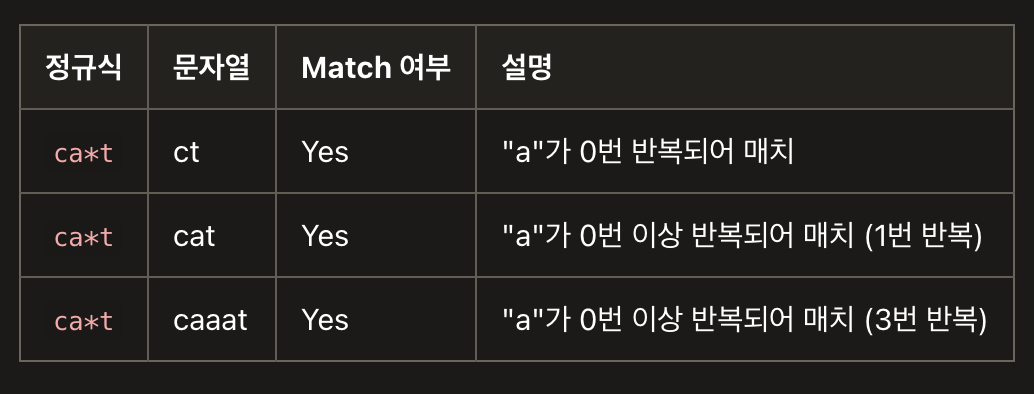


### 반복 (+)
반복을 나타내는 또 다른 메타 문자로 +가 있다. +는 최소 1번 이상 반복될 때 사용한다. 즉 *가 반복 횟수 0부터라면 +는 반복 횟수 1부터인 것이다.  

다음 정규식을 보자.

ca+t
위 정규식의 의미는 다음과 같다.

>"c + a(1번 이상 반복) + t"

위 정규식에 대한 매치여부는 다음 표와 같다.

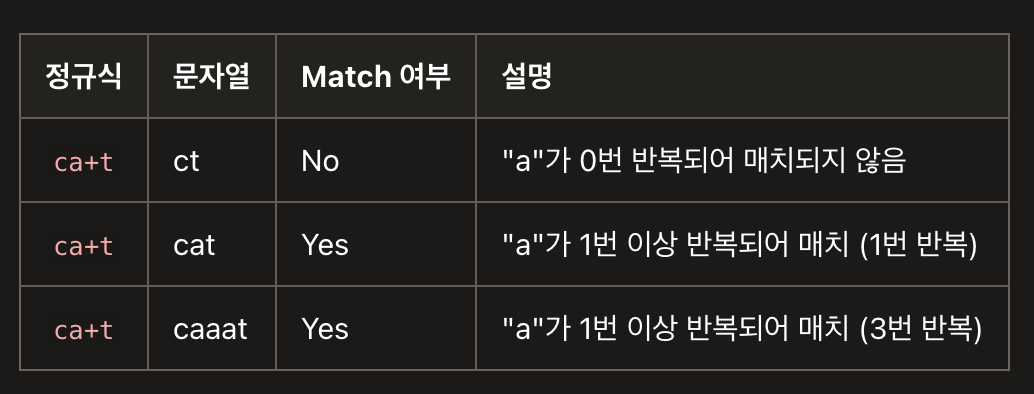

### 반복 ({m,n}, ?)

### 2. 파이썬에서 정규 표현식을 지원하는 re 모듈

여기에서 잠깐 생각해 볼 게 있다. 반복 횟수를 3회만 또는 1회부터 3회까지만으로 제한하고 싶을 수도 있지 않을까?

{ } 메타 문자를 사용하면 반복 횟수를 고정할 수 있다. {m, n} 정규식을 사용하면 반복 횟수가 m부터 n까지 매치할 수 있다. 또한 m 또는 n을 생략할 수도 있다. 만약 {3,}처럼 사용하면 반복 횟수가 3 이상인 경우이고 {,3}처럼 사용하면 반복 횟수가 3 이하를 의미한다. 생략된 m은 0과 동일하며, 생략된 n은 무한대(2억 개 미만)의 의미를 갖는다.

{1,}은 +와 동일하고, {0,}은 *와 동일하다.

{ }을 사용한 몇 가지 정규식을 살펴보자.

1. {m}

ca{2}t
위 정규식의 의미는 다음과 같다.

"c + a(반드시 2번 반복) + t"

위 정규식에 대한 매치여부는 다음 표와 같다.

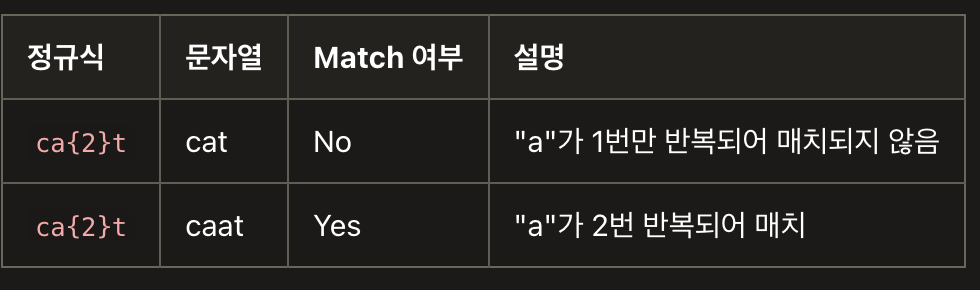

2. {m, n}

ca{2,5}t
위 정규식의 의미는 다음과 같다:

"c + a(2~5회 반복) + t"

위 정규식에 대한 매치여부는 다음 표와 같다.

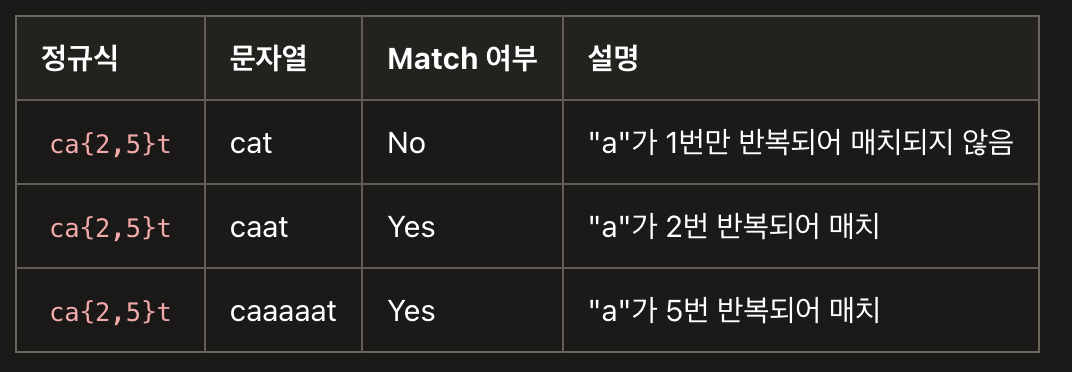

3. ?

반복은 아니지만 이와 비슷한 개념으로 ? 이 있다. ? 메타문자가 의미하는 것은 {0, 1} 이다.

다음 정규식을 보자.

ab?c
위 정규식의 의미는 다음과 같다:

>"a + b(있어도 되고 없어도 된다) + c"

위 정규식에 대한 매치여부는 다음 표와 같다.

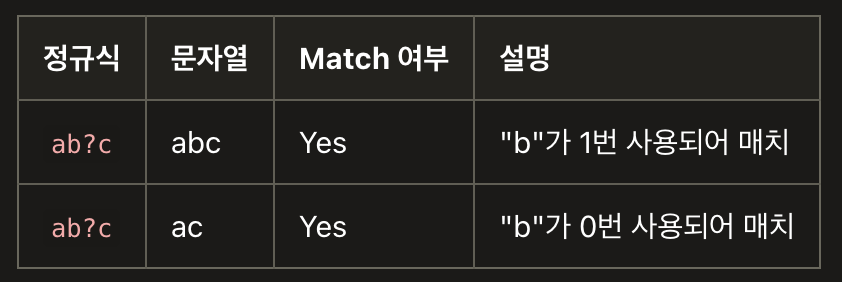

즉 b 문자가 있거나 없거나 둘 다 매치되는 경우이다.

*, +, ? 메타 문자는 모두 {m, n} 형태로 고쳐 쓰는 것이 가능하지만 가급적 이해하기 쉽고 표현도 간결한 *, +, ? 메타 문자를 사용하는 것이 좋다.

지금까지 아주 기초적인 정규 표현식에 대해서 알아보았다. 알아야 할 것들이 아직 많이 남아 있지만 그에 앞에서 파이썬으로 이러한 정규 표현식을 어떻게 사용할 수 있는지 먼저 알아보기로 하자.